In [3]:
!pip install pyproj

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 6.1/6.1 MB 5.3 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [3]:
!pip install folium

Defaulting to user installation because normal site-packages is not writeable


In [6]:
!python -m site

sys.path = [
    'C:\\Users\\ter18\\mysite\\flnal_project\\Team2_Jupyter_code',
    'C:\\ProgramData\\Anaconda3\\python39.zip',
    'C:\\ProgramData\\Anaconda3\\DLLs',
    'C:\\ProgramData\\Anaconda3\\lib',
    'C:\\ProgramData\\Anaconda3',
    'C:\\Users\\ter18\\AppData\\Roaming\\Python\\Python39\\site-packages',
    'C:\\ProgramData\\Anaconda3\\lib\\site-packages',
    'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\vboxapi-1.0-py3.9.egg',
    'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32',
    'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32\\lib',
    'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\Pythonwin',
]
USER_BASE: 'C:\\Users\\ter18\\AppData\\Roaming\\Python' (exists)
USER_SITE: 'C:\\Users\\ter18\\AppData\\Roaming\\Python\\Python39\\site-packages' (exists)
ENABLE_USER_SITE: True


In [2]:
import pyroj

In [4]:
import pandas as pd
import numpy as np
import pyproj
import folium

In [5]:
df = pd.read_csv('구좌읍애월읍xy.csv', encoding ='utf-8',
                usecols=['좌표정보(x)','좌표정보(y)'])
df

,좌표정보(x),좌표정보(y)
0,147994.2651,-4276.599384
1,147994.2651,-4276.599384
2,186734.7064,2826.983753
3,186516.4117,2988.293922
4,145213.3963,-1207.015501
...,...,...
7939,186797.8126,2807.001332
7940,145676.1922,-5391.525174
7941,186582.0962,2662.241820
7942,176913.1677,6562.657617


In [6]:
df['좌표정보(x)'] = pd.to_numeric(df['좌표정보(x)'], errors="coerce")
df['좌표정보(y)'] = pd.to_numeric(df['좌표정보(y)'], errors="coerce")

df = df.dropna()
df.index=range(len(df))

df.tail()

,좌표정보(x),좌표정보(y)
7939,186797.8126,2807.001332
7940,145676.1922,-5391.525174
7941,186582.0962,2662.241820
7942,176913.1677,6562.657617
7943,186851.8051,2719.300179


In [7]:
def project_array(coord, p1_type, p2_type):
    """
    좌표계 변환 함수
    - coord: x, y 좌표 정보가 담긴 NumPy Array
    - p1_type: 입력 좌표계 정보 ex) epsg:5179
    - p2_type: 출력 좌표계 정보 ex) epsg:4326
    """
    p1 = pyproj.Proj(init=p1_type)
    p2 = pyproj.Proj(init=p2_type)
    fx, fy = pyproj.transform(p1, p2, coord[:, 0], coord[:, 1])
    return np.dstack([fx, fy])[0]

In [8]:
# DataFrame -> NumPy Array 변환
coord = np.array(df)
coord

array([[147994.2651  ,  -4276.599384],
       [147994.2651  ,  -4276.599384],
       [186734.7064  ,   2826.983753],
       ...,
       [186582.0962  ,   2662.24182 ],
       [176913.1677  ,   6562.657617],
       [186851.8051  ,   2719.300179]])

In [9]:
# 좌표계 정보 설정
p1_type = "epsg:2097"
p2_type = "epsg:4326"

# project_array() 함수 실행
result = project_array(coord, p1_type, p2_type)
result

C:\Users\ter18\AppData\Roaming\Python\Python39\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\ter18\AppData\Roaming\Python\Python39\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\ter18\AppData\Local\Temp\ipykernel_10236\2093212355.py:10: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-p

array([[126.43854791,  33.45660362],
       [126.43854791,  33.45660362],
       [126.85513853,  33.52183099],
       ...,
       [126.85349827,  33.52034377],
       [126.7493206 ,  33.55534387],
       [126.8564006 ,  33.52086157]])

In [10]:
df['경도'] = result[:, 0]
df['위도'] = result[:, 1]

In [12]:
df.tail()

,좌표정보(x),좌표정보(y),경도,위도
7939,186797.8126,2807.001332,126.855818,33.521652
7940,145676.1922,-5391.525174,126.413683,33.446437
7941,186582.0962,2662.241820,126.853498,33.520344
7942,176913.1677,6562.657617,126.749321,33.555344
7943,186851.8051,2719.300179,126.856401,33.520862


In [11]:
df.to_csv('구좌읍애월읍위경도.csv', index=False)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


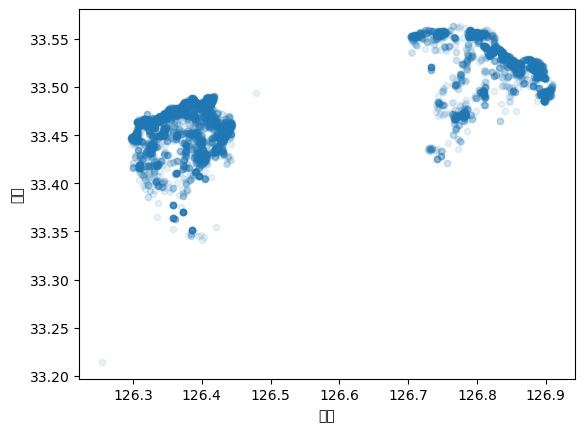

In [12]:
import matplotlib.pyplot as plt

df.plot(kind='scatter', x='경도', y='위도', alpha=0.1)
plt.show()

In [13]:
df_origin = pd.read_csv('구좌읍애월읍xy.csv', encoding ='utf-8')
df_origin

,개방서비스명,좌표정보(x),좌표정보(y),주소
0,병원,147994.2651,-4276.599384,애월읍
1,병원,147994.2651,-4276.599384,애월읍
2,의원,186734.7064,2826.983753,구좌읍
3,의원,186516.4117,2988.293922,구좌읍
4,의원,145213.3963,-1207.015501,애월읍
...,...,...,...,...
7939,유료직업소개소,186797.8126,2807.001332,구좌읍
7940,유료직업소개소,145676.1922,-5391.525174,애월읍
7941,유료직업소개소,186582.0962,2662.241820,구좌읍
7942,유료직업소개소,176913.1677,6562.657617,구좌읍


In [14]:
result = pd.concat([df_origin, df],axis=1)
result

,개방서비스명,좌표정보(x),좌표정보(y),주소,좌표정보(x),좌표정보(y),경도,위도
0,병원,147994.2651,-4276.599384,애월읍,147994.2651,-4276.599384,126.438548,33.456604
1,병원,147994.2651,-4276.599384,애월읍,147994.2651,-4276.599384,126.438548,33.456604
2,의원,186734.7064,2826.983753,구좌읍,186734.7064,2826.983753,126.855139,33.521831
3,의원,186516.4117,2988.293922,구좌읍,186516.4117,2988.293922,126.852786,33.523283
4,의원,145213.3963,-1207.015501,애월읍,145213.3963,-1207.015501,126.408450,33.484139
...,...,...,...,...,...,...,...,...
7939,유료직업소개소,186797.8126,2807.001332,구좌읍,186797.8126,2807.001332,126.855818,33.521652
7940,유료직업소개소,145676.1922,-5391.525174,애월읍,145676.1922,-5391.525174,126.413683,33.446437
7941,유료직업소개소,186582.0962,2662.241820,구좌읍,186582.0962,2662.241820,126.853498,33.520344
7942,유료직업소개소,176913.1677,6562.657617,구좌읍,176913.1677,6562.657617,126.749321,33.555344


In [15]:
df_new = result[['주소','위도','경도']]

In [16]:
ae_co = df_new[df_new['주소'].str.contains('애월')]
ae_co.reset_index(drop=True, inplace=True)

ae_co.head()

,주소,위도,경도
0,애월읍,33.456604,126.438548
1,애월읍,33.456604,126.438548
2,애월읍,33.484139,126.408450
3,애월읍,33.464045,126.322125
4,애월읍,33.472946,126.405840


In [17]:
ae_co.to_csv('애월_위도_경도.csv', index=False)

In [18]:
df_new = result[['주소','위도','경도']]

In [19]:
gu_co = df_new[df_new['주소'].str.contains('구좌읍')]
gu_co.reset_index(drop=True, inplace=True)

gu_co.head()

,주소,위도,경도
0,구좌읍,33.521831,126.855139
1,구좌읍,33.523283,126.852786
2,구좌읍,33.554468,126.748250
3,구좌읍,33.523268,126.854137
4,구좌읍,33.521078,126.855718


In [20]:
gu_co.to_csv('구좌_위도_경도.csv', index=False)

In [ ]:
# """

# Python implementation of the maximum coverage location problem.

# The program randomly generates a set of candidate sites, among 
# which the K optimal candidates are selected. The optimization 
# problem is solved by integer programming. 

# Author: Can Yang
# Date: 2019-11-22

# MIT License

# Copyright (c) 2019 Can Yang

# Permission is hereby granted, free of charge, to any person obtaining a copy
# of this software and associated documentation files (the "Software"), to deal
# in the Software without restriction, including without limitation the rights
# to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
# copies of the Software, and to permit persons to whom the Software is
# furnished to do so, subject to the following conditions:

# The above copyright notice and this permission notice shall be included in all
# copies or substantial portions of the Software.

# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
# AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
# OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
# SOFTWARE.

# """


# import numpy as np
# from scipy.spatial import distance_matrix
# from gurobipy import *
# from scipy.spatial import ConvexHull
# from shapely.geometry import Polygon, Point
# from numpy import random

# def generate_candidate_sites(points,M=100):
#     '''
#     Generate M candidate sites with the convex hull of a point set
#     Input:
#         points: a Numpy array with shape of (N,2)
#         M: the number of candidate sites to generate
#     Return:
#         sites: a Numpy array with shape of (M,2)
#     '''
#     hull = ConvexHull(points)
#     polygon_points = points[hull.vertices]
#     poly = Polygon(polygon_points)
#     min_x, min_y, max_x, max_y = poly.bounds
#     sites = []
#     while len(sites) < M:
#         random_point = Point([random.uniform(min_x, max_x),
#                              random.uniform(min_y, max_y)])
#         if (random_point.within(poly)):
#             sites.append(random_point)
#     return np.array([(p.x,p.y) for p in sites])

# def mclp(points,K,radius,M):
#     """
#     Solve maximum covering location problem
#     Input:
#         points: input points, Numpy array in shape of [N,2]
#         K: the number of sites to select
#         radius: the radius of circle
#         M: the number of candidate sites, which will randomly generated inside
#         the ConvexHull wrapped by the polygon
#     Return:
#         opt_sites: locations K optimal sites, Numpy array in shape of [K,2]
#         f: the optimal value of the objective function
#     """
#     print('----- Configurations -----')
#     print('  Number of points %g' % points.shape[0])
#     print('  K %g' % K)
#     print('  Radius %g' % radius)
#     print('  M %g' % M)
#     import time
#     start = time.time()
#     sites = generate_candidate_sites(points,M)
#     J = sites.shape[0]
#     I = points.shape[0]
#     D = distance_matrix(points,sites)
#     mask1 = D<=radius
#     D[mask1]=1
#     D[~mask1]=0
#     # Build model
#     m = Model()
#     # Add variables
#     x = {}
#     y = {}
#     for i in range(I):
#         y[i] = m.addVar(vtype=GRB.BINARY, name="y%d" % i)
#     for j in range(J):
#         x[j] = m.addVar(vtype=GRB.BINARY, name="x%d" % j)

#     m.update()
#     # Add constraints
#     m.addConstr(quicksum(x[j] for j in range(J)) == K)

#     for i in range(I):
#         m.addConstr(quicksum(x[j] for j in np.where(D[i]==1)[0]) >= y[i])

#     m.setObjective(quicksum(y[i]for i in range(I)),GRB.MAXIMIZE)
#     m.setParam('OutputFlag', 0)
#     m.optimize()
#     end = time.time()
#     print('----- Output -----')
#     print('  Running time : %s seconds' % float(end-start))
#     print('  Optimal coverage points: %g' % m.objVal)
    
#     solution = []
#     if m.status == GRB.Status.OPTIMAL:
#         for v in m.getVars():
#             # print v.varName,v.x
#             if v.x==1 and v.varName[0]=="x":
#                 solution.append(int(v.varName[1:]))
#     opt_sites = sites[solution]
#     return opt_sites,m.objVal

# def plot_input(points):
#     '''
#     Plot the result
#     Input:
#         points: input points, Numpy array in shape of [N,2]
#         opt_sites: locations K optimal sites, Numpy array in shape of [K,2]
#         radius: the radius of circle
#     '''
#     from matplotlib import pyplot as plt
#     fig = plt.figure(figsize=(8,8))
#     plt.scatter(points[:,0],points[:,1],c='C0')
#     ax = plt.gca()
#     ax.axis('equal')
#     ax.tick_params(axis='both',left=False, top=False, right=False,
#                        bottom=False, labelleft=False, labeltop=False,
#                        labelright=False, labelbottom=False)

# def plot_result(points,opt_sites,radius):
#     '''
#     Plot the result
#     Input:
#         points: input points, Numpy array in shape of [N,2]
#         opt_sites: locations K optimal sites, Numpy array in shape of [K,2]
#         radius: the radius of circle
#     '''
#     from matplotlib import pyplot as plt
#     fig = plt.figure(figsize=(8,8))
#     plt.scatter(points[:,0],points[:,1],c='C0')
#     ax = plt.gca()
#     plt.scatter(opt_sites[:,0],opt_sites[:,1],c='C1',marker='+')
#     for site in opt_sites:
#         circle = plt.Circle(site, radius, color='C1',fill=False,lw=2)
#         ax.add_artist(circle)
#     ax.axis('equal')
#     ax.tick_params(axis='both',left=False, top=False, right=False,
#                        bottom=False, labelleft=False, labeltop=False,
#                        labelright=False, labelbottom=False)

In [14]:
df.shape

(7944, 4)

In [21]:
# 데이터 100개 랜덤 추출
sample = df.sample(n=100)

# 지도 중심 좌표 설정
lat_c, lon_c = 37.53165351203043, 126.9974246490573

# Folium 지도 객체 생성
m = folium.Map(location=[lat_c, lon_c], zoom_start=6)

# 마커 생성
for _, row in sample.iterrows():
    lat, lon = row['위도'], row['경도']
    folium.Marker(location=[lat, lon]).add_to(m)
    
m

In [ ]:
# 데이터 100개 랜덤 추출
sample = df.sample(n=100)

# 지도 중심 좌표 설정
lat_c, lon_c = 37.53165351203043, 126.9974246490573

# Folium 지도 객체 생성
m = folium.Map(location=[lat_c, lon_c], zoom_start=6)

# 마커 생성
for _, row in sample.iterrows():
    lat, lon = row['위도'], row['경도']
    folium.Marker(location=[lat, lon]).add_to(m)
    
m

In [ ]:
os.chdir('C:/Users/user/Desktop/cj올리브/제주도') 
df2.to_csv('수용가능인원.csv')